# Q2: Consistent plotting

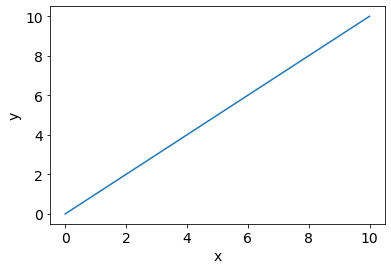

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def myplot(fun):
    def wrapper():
        #fig, ax = plt.subplots()
        plt.rcParams.update({'font.size': 14, 'figure.figsize': (6, 4)})
        fig = fun()
        plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
        return fig
    return wrapper 

@myplot
def plotter():
    x = np.linspace(0, 10, 10)
    y = np.linspace(0, 10, 10)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig

cb = plotter()

# Q1: The stock market

In [36]:
import random

states = np.array([0, 1, 2]) #bull, bear, stagnant
#transition probabilities from starting state
bull = np.array([0.9, 0.075, 0.025])
bear = np.array([0.15, 0.8, 0.05])
stagnant = np.array([0.25, 0.25, 0.5])
s_counts = np.array([0., 0., 0.])

def stock_market_1(states, s_counts, N_days):
    for i in range(N_days):
        state = np.random.choice(states)
        if state==0:
            if np.random.choice(bull) == bull[0]:
                state = 0
            if np.random.choice(bull) == bull[1]:
                state = 1
            if np.random.choice(bull) == bull[2]:
                state = 2    
        elif state == 1:
            if np.random.choice(bear) == bear[0]:
                state = 0
            if np.random.choice(bear) == bear[1]:
                state = 1
            if np.random.choice(bear) == bear[2]:
                state = 2
        elif state == 2:
            if np.random.choice(stagnant) == stagnant[0]:
                state = 0
            if np.random.choice(stagnant) == stagnant[1]:
                state = 1
            if np.random.choice(stagnant) == stagnant[2]:
                state = 2
    
        s_counts[state] += 1
    
    for i in range(len(s_counts)):
            s_counts[i] /= N_days
            
    return s_counts
            
stock_market_1(states, s_counts, 100000)

array([0.24714, 0.39358, 0.35928])

In [41]:
n_stock_market = njit(stock_market_1)
print(n_stock_market(states, s_counts, 100000))

print('pyhton time: ')
%timeit stock_market_1(states, s_counts, 100)
print('numba time: ')
%timeit n_stock_market(states, s_counts, 100)

[0.24703253 0.39360354 0.35937404]
pyhton time: 
12 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
numba time: 
22.5 µs ± 227 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
